In [2]:
import json
import os
import cv2 as cv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Brute force

In [6]:
data = pd.read_json('malaria/training.json')
data.head()

,image,objects
0,{'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af...,"[{'bounding_box': {'minimum': {'r': 1057, 'c':..."
1,{'checksum': '1225a18efce159eddf7b0e80e0ea642c...,"[{'bounding_box': {'minimum': {'r': 734, 'c': ..."
2,{'checksum': '3eaf840523c30fdf38897ffa01e194eb...,"[{'bounding_box': {'minimum': {'r': 724, 'c': ..."
3,{'checksum': '8a111dffacfa433029492780b9535091...,"[{'bounding_box': {'minimum': {'r': 563, 'c': ..."
4,{'checksum': 'ccef403e971460b86444cca669e68ca1...,"[{'bounding_box': {'minimum': {'r': 618, 'c': ..."


In [ ]:
data[]

### Data structure check

In [7]:
data['image'][0], data['objects'][0]

({'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
  'pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
  'shape': {'r': 1200, 'c': 1600, 'channels': 3}},
 [{'bounding_box': {'minimum': {'r': 1057, 'c': 1440},
    'maximum': {'r': 1158, 'c': 1540}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 868, 'c': 1303},
    'maximum': {'r': 971, 'c': 1403}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 578, 'c': 900},
    'maximum': {'r': 689, 'c': 1008}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 304, 'c': 611},
    'maximum': {'r': 408, 'c': 713}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 198, 'c': 881},
    'maximum': {'r': 312, 'c': 1003}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 193, 'c': 1480},
    'maximum': {'r': 293, 'c': 1574}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 257, 'c': 1384},
    'maximum': {'r'

### Img preview check

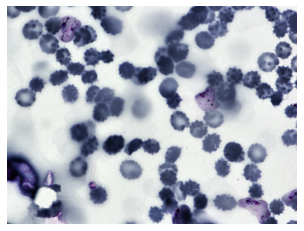

In [19]:
img ='malaria/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png'

img = cv.imread(img, 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

### Read json one more time

In [11]:
f = open('malaria/training.json', "r") 
data = json.loads(f.read()) 
  
f.close() 

### flatten_json() to flatten nested elements in dictionary

In [12]:
def flatten_json(nested_json):
    """
        Flatten json object with nested keys into a single level.
        Args:
            nested_json: A nested json object.
        Returns:
            The flattened json object if successful, None otherwise.
    """
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out


### Reformat each line of json to get df friendly structure

In [13]:
new_json = {}

for idx, line in enumerate(data):
    new_json[idx] = flatten_json(line)

new_json[0]

{'image_checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
 'image_pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
 'image_shape_r': 1200,
 'image_shape_c': 1600,
 'image_shape_channels': 3,
 'objects_0_bounding_box_minimum_r': 1057,
 'objects_0_bounding_box_minimum_c': 1440,
 'objects_0_bounding_box_maximum_r': 1158,
 'objects_0_bounding_box_maximum_c': 1540,
 'objects_0_category': 'red blood cell',
 'objects_1_bounding_box_minimum_r': 868,
 'objects_1_bounding_box_minimum_c': 1303,
 'objects_1_bounding_box_maximum_r': 971,
 'objects_1_bounding_box_maximum_c': 1403,
 'objects_1_category': 'red blood cell',
 'objects_2_bounding_box_minimum_r': 578,
 'objects_2_bounding_box_minimum_c': 900,
 'objects_2_bounding_box_maximum_r': 689,
 'objects_2_bounding_box_maximum_c': 1008,
 'objects_2_category': 'red blood cell',
 'objects_3_bounding_box_minimum_r': 304,
 'objects_3_bounding_box_minimum_c': 611,
 'objects_3_bounding_box_maximum_r': 408,
 'objects_3_bounding_box_maximum_c': 7

### Dump new_json to str locally

In [14]:
json_string = json.dumps(new_json)
type(json_string)

str

### Read json using pandas, change `orient` param to index

In [15]:
df_train = pd.read_json(json_string, orient ='index')
df_train

,image_checksum,image_pathname,image_shape_c,image_shape_channels,image_shape_r,objects_0_bounding_box_maximum_c,objects_0_bounding_box_maximum_r,objects_0_bounding_box_minimum_c,objects_0_bounding_box_minimum_r,objects_0_category,...,objects_99_bounding_box_maximum_c,objects_99_bounding_box_maximum_r,objects_99_bounding_box_minimum_c,objects_99_bounding_box_minimum_r,objects_99_category,objects_9_bounding_box_maximum_c,objects_9_bounding_box_maximum_r,objects_9_bounding_box_minimum_c,objects_9_bounding_box_minimum_r,objects_9_category
0,676bb8e86fc2dbf05dd97d51a64ac0af,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1600,3,1200,1540,1158,1440,1057,red blood cell,...,NaN,NaN,NaN,NaN,NaN,552.0,1087.0,454.0,992.0,red blood cell
1,1225a18efce159eddf7b0e80e0ea642c,/images/10be6380-cbbb-4886-8b9e-ff56b1710576.png,1600,3,1200,834,832,735,734,red blood cell,...,NaN,NaN,NaN,NaN,NaN,340.0,975.0,237.0,888.0,red blood cell
10,f07de588abfee1122cc9758cf94d7904,/images/f65a1633-9935-4984-a285-a60d30aa1707.png,1600,3,1200,1312,480,1199,363,red blood cell,...,NaN,NaN,NaN,NaN,NaN,901.0,224.0,795.0,118.0,red blood cell
100,b931432d53af7e54bd6d0fc20a6a88dd,/images/27cdd837-e40f-491e-8adb-61e493189832.png,1600,3,1200,983,259,870,137,red blood cell,...,NaN,NaN,NaN,NaN,NaN,1478.0,1027.0,1356.0,903.0,red blood cell
1000,0edee9495f126c2bd806b81ceebbf5cd,/images/da49db57-0c2f-4213-b322-c88c19fb9296.png,1600,3,1200,1488,820,1377,721,red blood cell,...,NaN,NaN,NaN,NaN,NaN,603.0,311.0,498.0,207.0,red blood cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68a83495030ae9d1bf5f8f30d8eface4,/images/5e042380-6ef2-496f-8231-0ca550fbfa71.png,1600,3,1200,707,1116,612,1030,red blood cell,...,514.0,789.0,426.0,705.0,red blood cell,1303.0,970.0,1206.0,888.0,red blood cell
996,2845317eb294ebca5b2aec7db9aec4cd,/images/50715879-2300-4dba-8f4a-3314ff8cfcce.png,1600,3,1200,370,771,272,674,red blood cell,...,NaN,NaN,NaN,NaN,NaN,132.0,1006.0,31.0,910.0,red blood cell
997,b299e34216af00e9005cd565265f9069,/images/45ac9409-5537-44ed-90cd-5c8a1ae0e1e0.png,1600,3,1200,1417,1092,1310,993,red blood cell,...,NaN,NaN,NaN,NaN,NaN,597.0,162.0,496.0,46.0,red blood cell
998,d91957c6fa9e8edc0e8ba45f928b69f5,/images/24418314-f7a4-49fc-a03e-ec597ca6796e.png,1600,3,1200,241,784,141,668,red blood cell,...,1058.0,388.0,981.0,310.0,red blood cell,134.0,776.0,21.0,665.0,red blood cell


## DF test

In [17]:
f = open('malaria/test.json', "r") 
data = json.loads(f.read()) 
  
f.close() 

new_json = {}

for idx, line in enumerate(data):
    new_json[idx] = flatten_json(line)

json_string = json.dumps(new_json)

df_test = pd.read_json(json_string, orient ='index')
df_test

,image_checksum,image_pathname,image_shape_c,image_shape_channels,image_shape_r,objects_0_bounding_box_maximum_c,objects_0_bounding_box_maximum_r,objects_0_bounding_box_minimum_c,objects_0_bounding_box_minimum_r,objects_0_category,...,objects_99_bounding_box_maximum_c,objects_99_bounding_box_maximum_r,objects_99_bounding_box_minimum_c,objects_99_bounding_box_minimum_r,objects_99_category,objects_9_bounding_box_maximum_c,objects_9_bounding_box_maximum_r,objects_9_bounding_box_minimum_c,objects_9_bounding_box_minimum_r,objects_9_category
0,eea3bfd6a929bcb06f9786667cd3fbb2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1944,3,1383,1883,708,1744,576,red blood cell,...,NaN,NaN,NaN,NaN,NaN,774,1199,654,1080,red blood cell
1,2d85fc8ffdb875bb569878243437e4f5,/images/64985a1e-16bb-4016-a01c-c21a5b86e572.jpg,1944,3,1383,1767,1170,1632,1048,red blood cell,...,NaN,NaN,NaN,NaN,NaN,1062,1089,921,958,red blood cell
10,316e46d12311e077d4009a796482bc98,/images/a612e0d5-6a95-43cc-96a6-6fbcb8d45ff4.jpg,1944,3,1383,631,1000,500,873,red blood cell,...,NaN,NaN,NaN,NaN,NaN,227,1311,115,1196,red blood cell
100,664ccd832bf33fbaca3cdb4013320eb7,/images/9cf3f75a-354c-46f9-8b53-0a9711ac8bee.jpg,1944,3,1383,1408,589,1271,447,red blood cell,...,NaN,NaN,NaN,NaN,NaN,1061,866,945,752,red blood cell
101,85b5252aca42a3ff4fe4a51cb2463c13,/images/efb85f8e-c780-4a19-b6ce-555a154b0d10.jpg,1944,3,1383,1125,987,1007,855,red blood cell,...,NaN,NaN,NaN,NaN,NaN,1030,1055,897,918,red blood cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2a6dd92a96874d9dae901ab83aaa8f8d,/images/47112c6b-aaf6-488d-8f3b-f9ed0cce9a95.jpg,1944,3,1383,521,921,389,785,red blood cell,...,NaN,NaN,NaN,NaN,NaN,447,762,306,629,red blood cell
96,9beea28e83f5c9599099a9b1508967c0,/images/b1d312cf-1f52-4955-bf42-58d3664c254a.jpg,1944,3,1383,1051,816,930,689,red blood cell,...,NaN,NaN,NaN,NaN,NaN,1335,626,1208,509,red blood cell
97,c3d744ff11f88c3735339723056a3e49,/images/5c399ab9-492c-4bfc-a452-83aba574a3bc.jpg,1944,3,1383,160,818,36,686,red blood cell,...,NaN,NaN,NaN,NaN,NaN,1837,330,1693,200,red blood cell
98,95ab446a4fedfc792b463c907fb34e12,/images/96957ec3-de17-41cf-855b-1388814e5918.jpg,1944,3,1383,970,196,849,83,red blood cell,...,NaN,NaN,NaN,NaN,NaN,1723,775,1599,650,red blood cell
